# HR ATTRIBUTION

In [62]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
import seaborn as sns

# 1.) Import, split data into X/y, plot y data as bar charts, turn X categorical variables binary and tts.

In [63]:
df = pd.read_csv('/Users/adrianonggowarsito/Desktop/HR_Analytics.csv')

In [64]:
y = df[["Attrition"]].copy()
X = df.drop("Attrition", axis = 1)

In [65]:
y["Attrition"] = [1 if i == "Yes" else 0 for i in y["Attrition"]]

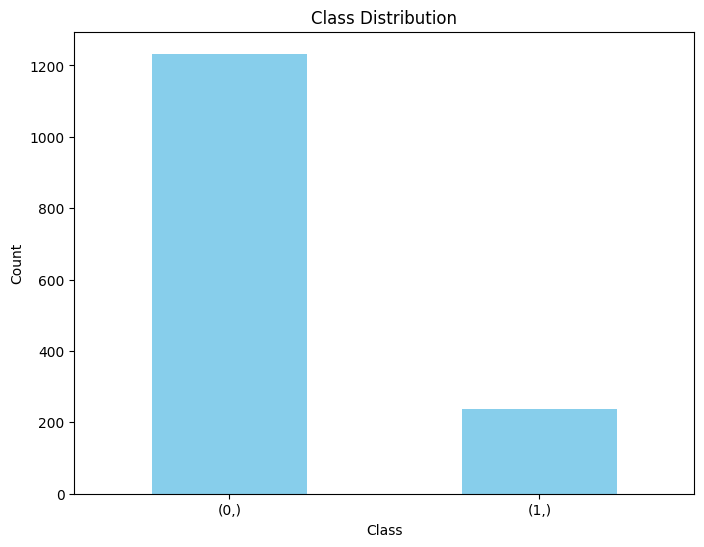

In [66]:
class_counts = y.value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=0)  # Remove rotation of x-axis labels
plt.show()

In [67]:
# Step 1: Identify string columns
string_columns = X.columns[X.dtypes == 'object']

# Step 2: Convert string columns to categorical
for col in string_columns:
    X[col] = pd.Categorical(X[col])

# Step 3: Create dummy columns
X = pd.get_dummies(X, columns=string_columns, prefix=string_columns,drop_first=True)

In [68]:
x_train,x_test,y_train,y_test=train_test_split(X,
 y, test_size=0.20, random_state=42)

# 2.) Using the default Decision Tree. What is the In/Out of Sample accuracy?

In [69]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_train)
acc=accuracy_score(y_train,y_pred)
print("IN SAMPLE ACCURACY : " , round(acc,2))

y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("OUT OF SAMPLE ACCURACY : " , round(acc,2))

IN SAMPLE ACCURACY :  1.0
OUT OF SAMPLE ACCURACY :  0.77


# 3.) Run a grid search cross validation using F1 score to find the best metrics. What is the In and Out of Sample now?

In [70]:
# Define the hyperparameter grid to search through
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 11),  # Range of max_depth values to try
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


dt_classifier = DecisionTreeClassifier(random_state=42)

scoring = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, scoring=scoring, cv=5)

grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best F1-Score:", best_score)

Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best F1-Score: 0.8214764475510983


In [71]:
clf = tree.DecisionTreeClassifier(**best_params, random_state =42)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_train)
acc=accuracy_score(y_train,y_pred)
print("IN SAMPLE ACCURACY : " , round(acc,2))

y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("OUT OF SAMPLE ACCURACY : " , round(acc,2))

IN SAMPLE ACCURACY :  0.91
OUT OF SAMPLE ACCURACY :  0.83


# 4.) Plot

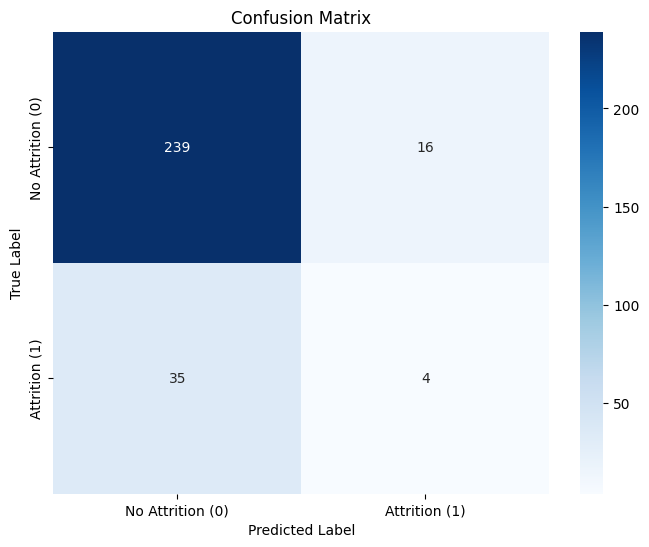

In [72]:
# Make predictions on the test data
y_pred = clf.predict(x_test)
y_prob = clf.predict_proba(x_test)[:, 1]

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Set the tick marks for an NxN confusion matrix
tick_marks = np.arange(len(class_counts)) + 0.5
plt.xticks(tick_marks, ['No Attrition (0)', 'Attrition (1)'], ha='center')
plt.yticks(tick_marks, ['No Attrition (0)', 'Attrition (1)'], va='center')
plt.show()

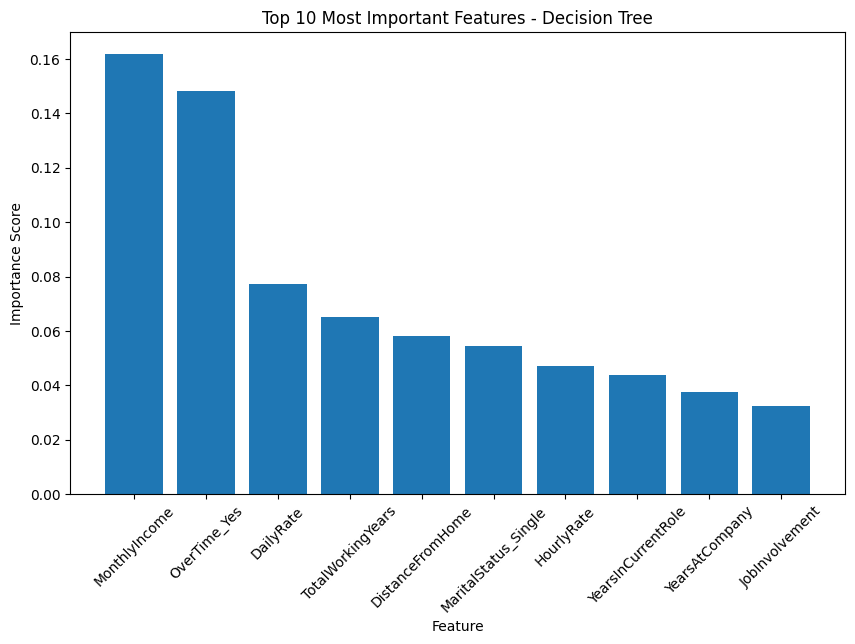

In [73]:
feature_importance = clf.feature_importances_

# Sort features by importance and select the top 10
top_n = 10
top_feature_indices = np.argsort(feature_importance)[::-1][:top_n]
top_feature_names = X.columns[top_feature_indices]
top_feature_importance = feature_importance[top_feature_indices]

# Plotting the top 10 most important features
plt.figure(figsize=(10, 6))
plt.bar(top_feature_names, top_feature_importance)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Top 10 Most Important Features - Decision Tree')
plt.xticks(rotation=45)
plt.show()

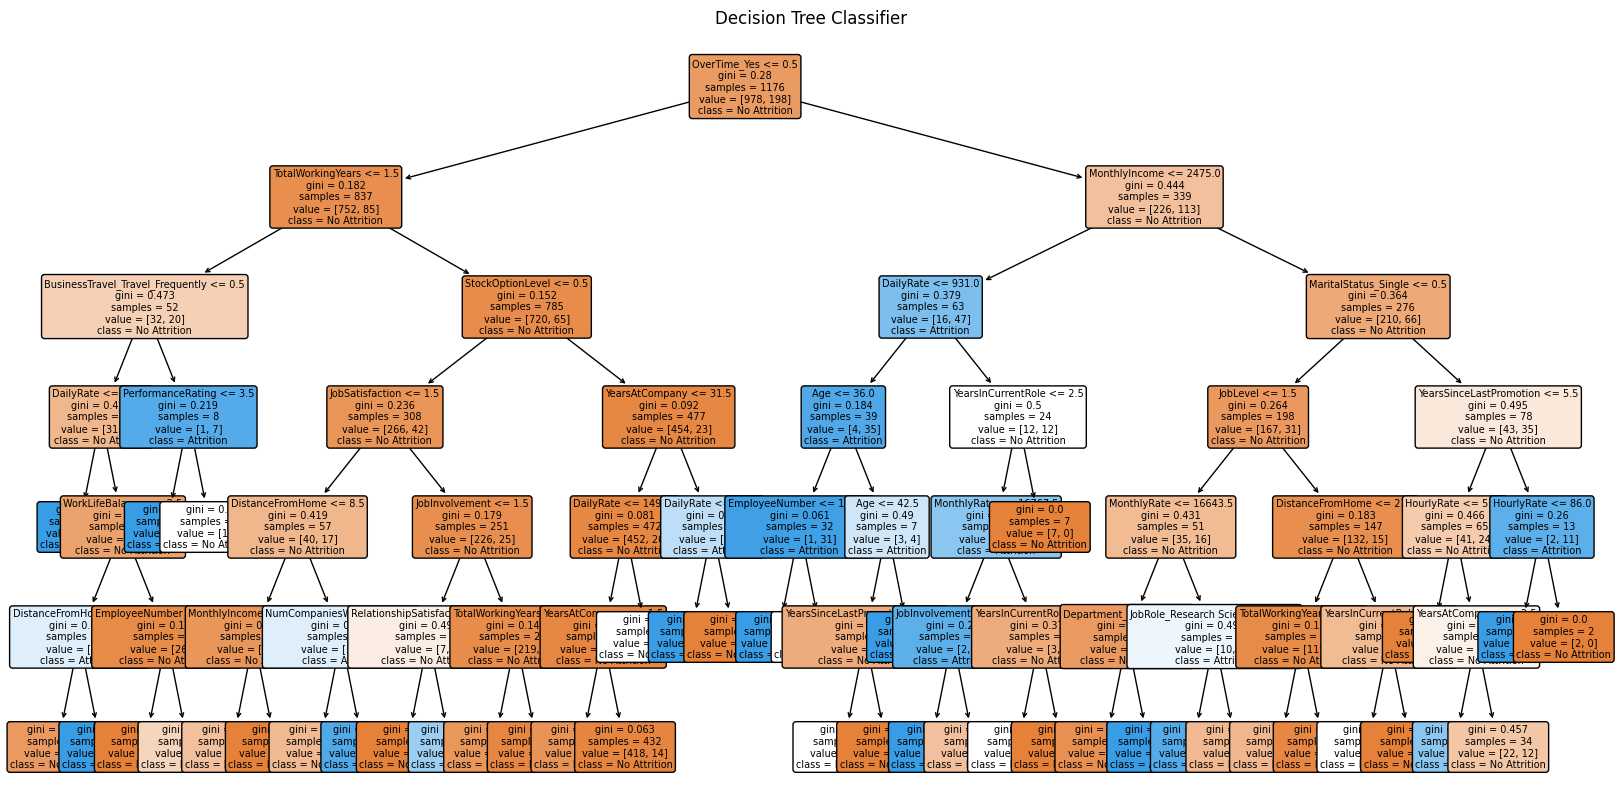

In [74]:
# Plotting the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=list(X.columns), class_names=["No Attrition", "Attrition"], rounded=True, fontsize=7)
plt.title('Decision Tree Classifier')
plt.show()

# 5.) Looking at the graphs. what would be your suggestions to try to improve customer retention? What additional information would you need for a better plan. Plot anything you think would assist in your assessment.

## ANSWER :

In [75]:
from scipy.stats import pearsonr

In [76]:
def calculate_correlation(X,feature_name,y):
    feature = X(feature_name)
    
    coef, _ = pearsonr(feature,y)
    
    return(coef)

In [77]:
np.corrcoef(np.array(X['OverTime_Yes']), np.array(y['Attrition']))

array([[1.        , 0.24611799],
       [0.24611799, 1.        ]])

# 6.) Using the Training Data, if they made everyone work overtime. What would have been the expected difference in client retention?

In [78]:
x_train_experiment = x_train.copy()

In [79]:
x_train_experiment['OverTime_Yes'] = 0.

In [80]:
y_pred = clf.predict(x_train)
y_pred_experiment = clf.predict(x_train_experiment)

In [81]:
diff = sum(y_pred - y_pred_experiment)

print("Change in Attrition :", diff)

Change in Attrition : 59


# 7.) If they company loses an employee, there is a cost to train a new employee for a role ~2.8 * their monthly income.
# To make someone not work overtime costs the company 2K per person.
# Is it profitable for the company to remove overtime? If so/not by how much? 
# What do you suggest to maximize company profits?

In [82]:
x_train_experiment['Y'] = y_pred
x_train_experiment['Y_exp'] = y_pred_experiment

In [83]:
x_train_experiment['RetChange'] = x_train_experiment['Y_exp'] - x_train_experiment['Y']

In [84]:
savings = sum(-2.8 * x_train_experiment['RetChange'] * x_train_experiment['MonthlyIncome'])

In [85]:
cost = len(x_train[x_train["OverTime_Yes"]==1])*2000

In [86]:
savings-cost

-117593.99999999977

## ANSWER : 

savings - cost = -117593.99, which suggests a loss of approximately $117,594. This indicates that the cost of removing overtime (and thus paying employees not to work overtime) is more expensive than the savings garnered from potentially lower attrition rates. It would mean that it is not profitable for the company to remove overtime.

To maximize company profits, we need to look for a point where this number becomes positive or at least reduces in negativity (closer to zero or positive), which would mean the company is either losing less money or actually saving money by reducing or removing overtime.

# 8.) Use your model and get the expected change in retention for raising and lowering peoples income. Plot the outcome of the experiment. Comment on the outcome of the experiment and your suggestions to maximize profit.

In [95]:
raise_amount = 100

In [96]:
profits = []
for raise_amount in range(-1000, 1000, 100):
    x_train_experiment = x_train.copy()
    x_train_experiment['MonthlyIncome'] = x_train_experiment['MonthlyIncome'] + raise_amount
    
    y_pred = clf.predict(x_train)
    y_pred_experiment = clf.predict(x_train_experiment)
    
    diff = sum(y_pred - y_pred_experiment)
    print("Change in Attrition", diff)
    
    x_train_experiment['Y'] = y_pred
    x_train_experiment['Y_exp'] = y_pred_experiment
    x_train_experiment['RetChange'] = x_train_experiment['Y_exp'] - x_train_experiment['Y']
    
    savings = sum(-2.8 * x_train_experiment['RetChange'] * x_train_experiment['MonthlyIncome'])
    cost = len(x_train) * raise_amount
    
    print('Profit', savings-cost)
    profits.append(savings-cost)

Change in Attrition -16
Profit 1087584.4
Change in Attrition -14
Profit 979524.0
Change in Attrition -13
Profit 864992.8
Change in Attrition -12
Profit 750738.8
Change in Attrition -12
Profit 629778.8
Change in Attrition -9
Profit 530138.0
Change in Attrition -7
Profit 424200.0
Change in Attrition -4
Profit 326096.4
Change in Attrition -1
Profit 228440.8
Change in Attrition -1
Profit 110714.8
Change in Attrition 0
Profit 0.0
Change in Attrition 6
Profit -75328.40000000001
Change in Attrition 15
Profit -127503.60000000002
Change in Attrition 15
Profit -240914.8
Change in Attrition 21
Profit -311586.80000000005
Change in Attrition 22
Profit -416449.6000000001
Change in Attrition 22
Profit -527889.6000000001
Change in Attrition 22
Profit -639329.6000000001
Change in Attrition 22
Profit -750769.6000000001
Change in Attrition 23
Profit -854999.6000000001


<function matplotlib.pyplot.show(close=None, block=None)>

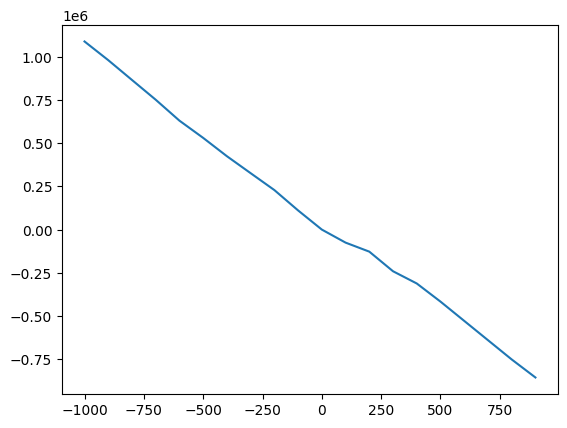

In [97]:
plt.plot(range(-1000, 1000, 100), profits)
plt.show

## ANSWER : 

The plot at the end shows profits across the range of raise_amount values. The trend is downward, indicating that as the raise_amount increases, the profits decrease, which is likely due to the increasing cost of the raises surpassing any savings from reduced attrition.

The negative profit at higher raise amounts suggests that simply increasing wages across the board may not be the most cost-effective method for improving employee retention, and that there is a tipping point where the cost of increased wages outweighs the savings from reduced turnover.